In [1]:
import pandas as pd
df = pd.read_csv('iris.csv')
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [2]:
df['Name'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [3]:
df['Name'] = df['Name'].replace({'setosa':1, 'versicolor':2, 'virginica':3})
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [4]:
df.isna().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

In [5]:
X = df.drop(columns = 'Name')
y = df['Name']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25 , random_state= 45)

In [7]:
from sklearn import svm
svc = svm.SVC().fit(X_train, y_train)

In [8]:
svc.score(X_test, y_test)

0.9210526315789473

In [9]:
svc.predict(X_test)

array([1, 1, 3, 1, 1, 1, 1, 3, 2, 3, 1, 3, 3, 3, 2, 1, 3, 3, 1, 2, 2, 2,
       3, 2, 1, 3, 2, 2, 1, 2, 2, 2, 2, 3, 1, 3, 1, 1], dtype=int64)

In [36]:
svc.intercept_

array([ 0.14068258, -0.07754717, -0.04752222])

In [11]:
# print the intercept and coefficients 
print(svc.intercept_) #hệ số chặn

print(lr.coef_)      #hệ số hồi quy

[ 0.14068258 -0.07754717 -0.04752222]


In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dec = DecisionTreeClassifier(max_depth=8).fit(X_train, y_train)

In [30]:
dec.score(X_train, y_train)

1.0

In [31]:
dec.score(X_test, y_test)

0.9473684210526315

In [34]:
dec.coef_

AttributeError: 'DecisionTreeClassifier' object has no attribute 'coef_'

# improve the model

In [15]:
#improve the model
from sklearn import svm
svc1 = svm.SVC(C = 0.1, kernel='poly', gamma='auto').fit(X_train, y_train)

In [16]:
svc1.score(X_test, y_test)

0.9473684210526315

In [19]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_pred = svc1.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0,  9,  0],
       [ 0,  2, 13]], dtype=int64)

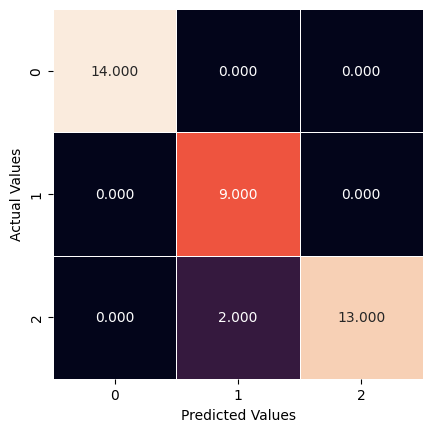

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot= True, fmt = '0.3f', linewidth = 0.5,
           square = True, cbar = False)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

As we can see, there is only 2 false predict

In [22]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.82      1.00      0.90         9
           3       1.00      0.87      0.93        15

    accuracy                           0.95        38
   macro avg       0.94      0.96      0.94        38
weighted avg       0.96      0.95      0.95        38



In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9473684210526315